In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [3]:
!pip install neattext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.9 MB/s eta 0:00:00


In [4]:
import neattext as nt
import neattext.functions as nfx

In [5]:
data = {
    'text': [
        "I'm feeling great today!",
        "I hate this so much.",
        "What a beautiful morning",
        "I'm really sad and tired.",
        "You're making me angry!",
        "This is so scary...",
        "I'm excited for tomorrow!",
        "I feel nothing.",
        "Ugh, so frustrating!",
        "I'm completely relaxed."
    ],
    'emotion': [
        "happy",
        "angry",
        "happy",
        "sad",
        "angry",
        "fear",
        "happy",
        "neutral",
        "angry",
        "neutral"
    ]
}

df = pd.DataFrame(data)
df.head()


,text,emotion
0,I'm feeling great today!,happy
1,I hate this so much.,angry
2,What a beautiful morning,happy
3,I'm really sad and tired.,sad
4,You're making me angry!,angry


In [6]:
df['clean_text'] = df['text'].apply(nfx.remove_special_characters)
df['clean_text'] = df['clean_text'].apply(nfx.remove_stopwords)
df[['text', 'clean_text', 'emotion']].head()


,text,clean_text,emotion
0,I'm feeling great today!,Im feeling great today,happy
1,I hate this so much.,hate,angry
2,What a beautiful morning,beautiful morning,happy
3,I'm really sad and tired.,Im sad tired,sad
4,You're making me angry!,Youre making angry,angry


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Features and Labels
X = df['clean_text']
y = df['emotion']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [9]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train
model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

Accuracy: 0.0
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       2.0
       happy       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

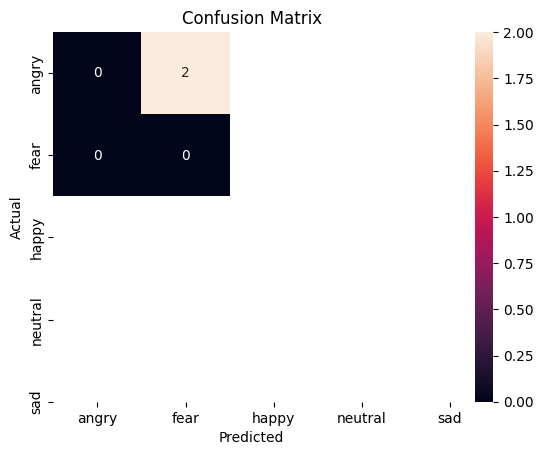

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test_cv)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
import joblib

# Save the model
joblib.dump(model, "emotion_model.pkl")

# Save the CountVectorizer
joblib.dump(cv, "vectorizer.pkl")


['vectorizer.pkl']

In [12]:
# Load model and vectorizer (optional if in the same session)
model = joblib.load("emotion_model.pkl")
cv = joblib.load("vectorizer.pkl")

def predict_emotion(text):
    cleaned = nfx.remove_stopwords(nfx.remove_special_characters(text))
    vector = cv.transform([cleaned])
    prediction = model.predict(vector)
    return prediction[0]

# Test
sample = "I can't wait for the trip!"
print("Text:", sample)
print("Predicted Emotion:", predict_emotion(sample))


Text: I can't wait for the trip!
Predicted Emotion: happy
